# Изучение закономерностей, определяющих успешность игр

## Описание проекта

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Доступны данные до 2016 года. Представим, что сейчас декабрь 2016 г., и планируется кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Цель проекта

Используя исторические данные о продажах компьютерных игр, оценки пользователей и экспертов, жанры и платформы, выявить закономерности, определяющие успешность игры 

##  Загрузка данных и изучение общей информации

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import os

In [3]:
pth1 = 'games.csv'
pth2 = '/datasets/games.csv'

if os.path.exists(pth1):
    df = pd.read_csv(pth1)
elif os.path.exists(pth2):
    df = pd.read_csv(pth2)
else:
    print('Something is wrong')

In [4]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Набор данных содержит 16715 записей об исторических продажах игр и включает следующую информацию: 
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Подготовка данных

In [6]:
# приведем у нижнему регистру названия столбцов
df.columns = df.columns.str.lower()

In [7]:
df.columns 

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [8]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [9]:
df['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

Видим только целые числа - приведем к Int64

In [10]:
df[['critic_score', 
    'year_of_release']] = df[['critic_score', 
                              'year_of_release']].astype('Int64')

In [11]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Видим значение "tbd"(to be tetermined) среди действительных чисел в столбце user_score - фактически это пропуск, уберем его и превратим столбец во float

In [12]:
df.user_score.replace({'tbd': np.nan}, inplace = True)
df['user_score'] = df['user_score'].astype('float32')

Столбцы na_sales, eu_sales, jp_sales, other_sales привдем к float32 в целях экономии памяти

In [13]:
df[['na_sales', 
    'eu_sales', 
    'jp_sales', 
    'other_sales']] = df[['na_sales', 
                          'eu_sales', 
                          'jp_sales', 
                          'other_sales']].astype('float32')

In [14]:
# проверим на  дубликаты
df.duplicated().sum()

0

Набор данных не содержит явных дубликатов

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float32
 5   eu_sales         16715 non-null  float32
 6   jp_sales         16715 non-null  float32
 7   other_sales      16715 non-null  float32
 8   critic_score     8137 non-null   Int64  
 9   user_score       7590 non-null   float32
 10  rating           9949 non-null   object 
dtypes: Int64(2), float32(5), object(4)
memory usage: 1.1+ MB


In [16]:
# посмотрим пропуски в процентном соотношении
df.isna().mean()*100

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         54.591684
rating             40.478612
dtype: float64

Видим, что в столбцах name, year_of_release и genre пропуски составляют всего 0-1 процента отностительно общего объема данных - просто удалим такие строки

In [17]:
df.dropna(subset=['name', 'genre', 'year_of_release'],
          inplace = True)

В столбцах critic_score, user_score, rating просто удалить пропуски не получится, они составляют около половины объема данных. Можно, конечно, заполнить медианным значением с группировкой по году или платформе, но так как столбцы с рейтингом ялвяются целевыми признаками набора данных и впоследствии на их основе будут проверяться гипотезы, необходимо сохранить значения в оценках наиболее достоверными. Поэтому придется оставить пропуски в этих столбцах без изменений.

Посчитаем суммарные продажи во всех регионах и запишем в отдельный столбец 

In [18]:
sales = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
df['sales_total']= df[sales].sum(axis=1)

In [19]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
0,Wii Sports,Wii,2006,Sports,41.360001,28.959999,3.77,8.45,76,8.0,E,82.539993
1,Super Mario Bros.,NES,1985,Platform,29.080000,3.580000,6.81,0.77,<NA>,NaN,NaN,40.240002
2,Mario Kart Wii,Wii,2008,Racing,15.680000,12.760000,3.79,3.29,82,8.3,E,35.520000
3,Wii Sports Resort,Wii,2009,Sports,15.610000,10.930000,3.28,2.95,80,8.0,E,32.770000
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.270000,8.890000,10.22,1.00,<NA>,NaN,NaN,31.380001


## Исследовательский анализ данных

Посмотрим сколько игр выпускалось в разные годы 

Text(0.5, 1.0, 'Количество выпущенных игр в разные годы')

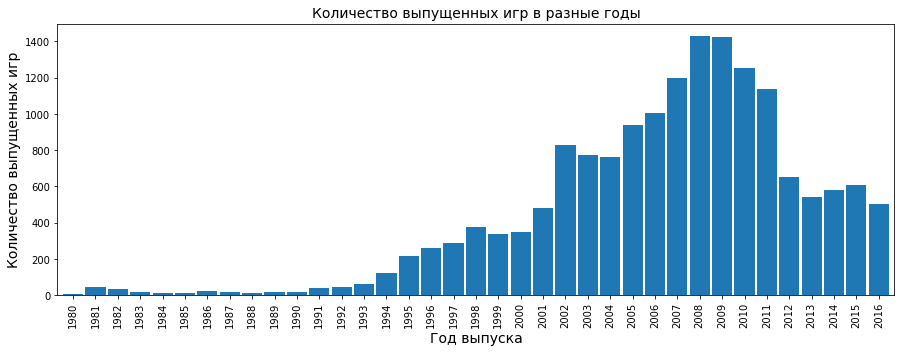

In [20]:
df.groupby('year_of_release').name.count().plot(kind = 'bar',
                                                figsize = (15,5),
                                                width = 0.9)
plt.xlabel('Год выпуска', fontsize=14)
plt.ylabel('Количество выпущенных игр', fontsize=14)
plt.title('Количество выпущенных игр в разные годы', fontsize=14)

Пиковые значения выпуска игр приходится на 2008-2009 годы. Видим, что до 1994 года выпуск игр был минимальным, поэтому привлекать к дальнейшему анализу данные до 1994 года не имеет смысла

Посмотрим, как менялись продажи по платформам

In [21]:
# Какие платформы вообще есть
df.platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [22]:
# отранжируем платформы по суммарным продажам
top_platforms = df.query('year_of_release >= 1994'
                        ).groupby('platform').sales_total.sum().sort_values(ascending = False)
top_platforms.to_frame()

,sales_total
platform,
PS2,1233.559937
X360,961.239990
PS3,931.339966
Wii,891.179993
DS,802.760010
PS,727.580017
PS4,314.140015
GBA,312.880005
PSP,289.529999


Text(0.5, 1.0, 'Распределение по годам для платформ с наибольшими суммарными продажами')

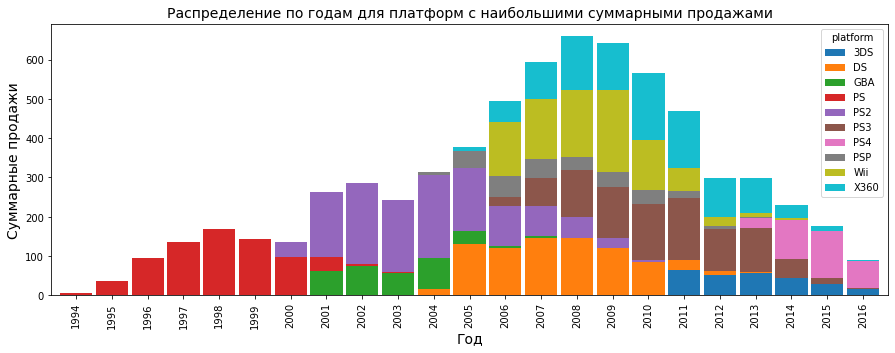

In [23]:
# Построим распределение по годам для 10 платформ с наибольшими суммарными продажами
df.query('''platform in \
          @top_platforms.head(10).index and \
          year_of_release >= 1994''').pivot_table(index = 'year_of_release',
                                                  columns = 'platform',
                                                  values = 'sales_total',
                                                  aggfunc = 'sum').plot(kind = 'bar',
                                                                          stacked = True,
                                                                          width=0.9,
                                                                          figsize = (15,5)
                                                                         )
plt.ylabel('Суммарные продажи', fontsize=14)
plt.xlabel('Год', fontsize=14) 
plt.title('Распределение по годам для платформ с наибольшими суммарными продажами', fontsize=14)

По графику можно видеть, что характерный срок, за который появляются новые и исчезают старые платформы: 3-4 года. Видим, что к 2015-2016г. из особо-продаваемых платформ наиболее популярной является PS4, выпуск игр на которй начался еще в 2013 году. Чтобы не учитывать при анализе устаревшие тренды, возьмем 2013 год за начало актуального периода. Для дальнейшего анализа будем использовать только данные этого актуального периода  

In [24]:
# сохраним исходный датасет в отдельный dataframe, вдруг пригодится
df_init = df.copy()

# ограничим датасет актуальными данными начиная с 2013.
df = df.query('year_of_release >= 2013').reset_index(drop=True)

In [25]:
# Отранжируем платформы по суммарным продажам
top_platforms = df.groupby('platform').sales_total.sum().sort_values(ascending = False)
top_platforms.to_frame()

,sales_total
platform,
PS4,314.140015
PS3,181.429993
XOne,159.320007
3DS,143.250000
X360,136.800003
WiiU,64.629997
PC,39.430000
PSV,32.989998
Wii,13.660000


Видим, что за весь период с 2013г. по 2016г. по суммарным продажам лидируют платформы PS4, PS3 и XOne

Text(0.5, 1.0, 'Изменения суммарных продаж с 2013 по 2016 год')

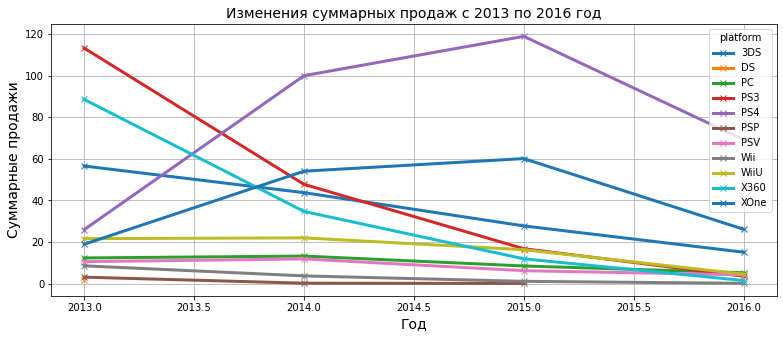

In [26]:
# Посмотрим как меняются суммарные продажи на платформах с 2013 по 2016г
df.pivot_table(index = 'year_of_release',
                                                       columns = 'platform',
                                                       values = 'sales_total',
                                                       aggfunc = 'sum').plot(kind = 'line',
                                                                              marker='x', 
                                                                              linewidth=3,
                                                                              grid = True,
                                                                              figsize = (13,5)
                                                                             )
plt.ylabel('Суммарные продажи', fontsize=14)
plt.xlabel('Год', fontsize=14)
plt.title('Изменения суммарных продаж с 2013 по 2016 год', fontsize=14)

На графике можно заметить, что к 2016г. продажи на всех платформах снижаются относительно 2015 года. Вероятно, это связано с тем, что на момент формирвания таблицы год еще не закончился, и данные за 2016 неполные. Поэтому, лучше оринетироваться на 2015 год. К 2015 году: 
- продажи игр на платформах PS4 и XOne растут. У PS4 лучшие суммарные продажи в 2015 году
- продажи игр на всех других платформах стремительно падают
- PS4 и XOne можно выделить как потенциально прибыльные платформы

Посмотрим распределения глобальных продаж игр с 2013. в разбивке по плафтормам. Построим диаграммы размаха.

Text(0.5, 1.0, 'Распределение глобальных продаж игр с 2013г. в разбивке по платформам')

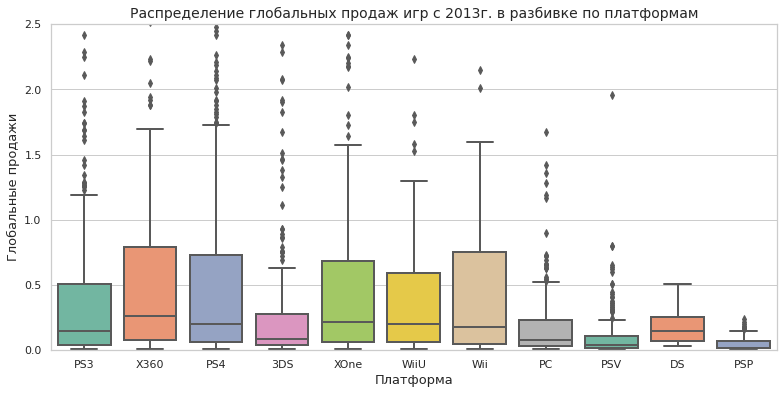

In [27]:
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [13, 6]

ax = sns.boxplot(x='platform', 
                 y='sales_total', 
                 linewidth=2,
                 palette='Set2',
                 data=df
                              
                )
plt.ylim(0, 2.5)
plt.ylabel('Глобальные продажи', fontsize=13)
plt.xlabel('Платформа', fontsize=13)
plt.title('Распределение глобальных продаж игр с 2013г. в разбивке по платформам', fontsize=14)

По платформе Wii видим, что уровень распределения глобальных продаж достаточно выскокий, что несколько противоречит выводам по суммарным продажам.

In [28]:
# отранжируем платформы по количеству записей 
top_platforms = df.groupby('platform').sales_total.count().sort_values(ascending = False)
top_platforms.to_frame()

,sales_total
platform,
PS4,392
PSV,358
PS3,345
3DS,303
XOne,247
PC,189
X360,186
WiiU,115
PSP,67


Видим, что в выборку для платформы Wii попадают данные всего по 23 играм. Такой размер выборки явно недостаточен для оценки формы распределений, формирования закономерностей и последующих выводов. То же самое для платформы DS. 

Таким образом, анализируя боксплоты, видим, что платформы X360, PS4, XOne с 2013 года имеют наиболее высокий уровень распределений глобальных продаж (не считаем выбросы). Также видно, что межквартильный размах глобальных продаж (центральные 50% данных) по этим платформам примерно одинаков (от ~0.1 до  ~0.7) и существенно шире чем для остальных платформ. 

Посмотрим как влияют оценки пользователей и критиков на общие продажи на примере платформы XOne. Для этого оценим коэффициент корреляции и построим матрицу диаграмм рассеяния для рассматриваемых признаков

,sales_total,user_score,critic_score
sales_total,1.000000,-0.068925,0.416998
user_score,-0.068925,1.000000,0.472462
critic_score,0.416998,0.472462,1.000000


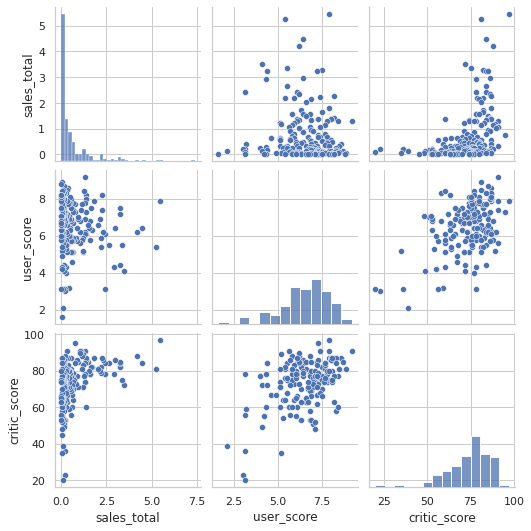

In [29]:
display(df.query('platform == "XOne"')[['sales_total', 
                                        'user_score', 
                                        'critic_score']].corr())

sns.pairplot(df.query('platform == "XOne"')[['sales_total', 
                                            'user_score', 
                                            'critic_score']])

Выводы:
- Видим, что линейной зависимости между отзывами пользователей и общими продажами нет, коэффициент корреляции: -0.07. На графике также зависимости не прослеживается
- Между отзывами критиков и общимим продажами коэффициент корреляции 0.42, что говорит о наличие слабой линейной взаимосвязи между признаками. Об этом говорит также график рассеяния - прослеживается некоторая завимость, которая лучше описывается нелинейной функцией, например, экспонентой.

Соотнесимем выводы по платформе Xone с продажами игр на других популярных платформах.

In [30]:
df['sales_log'] = df.sales_total.apply(np.log)

Для платформы PS4:

,sales_total,user_score,critic_score
sales_total,1.000000,-0.031957,0.406568
user_score,-0.031957,1.000000,0.557654
critic_score,0.406568,0.557654,1.000000


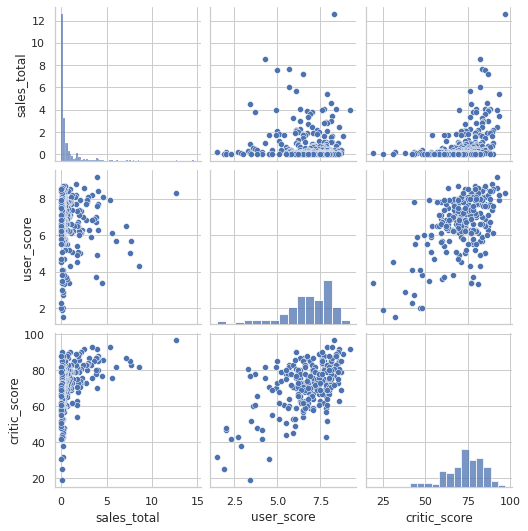


Для платформы PS3:

,sales_total,user_score,critic_score
sales_total,1.000000,0.002394,0.334285
user_score,0.002394,1.000000,0.599920
critic_score,0.334285,0.599920,1.000000


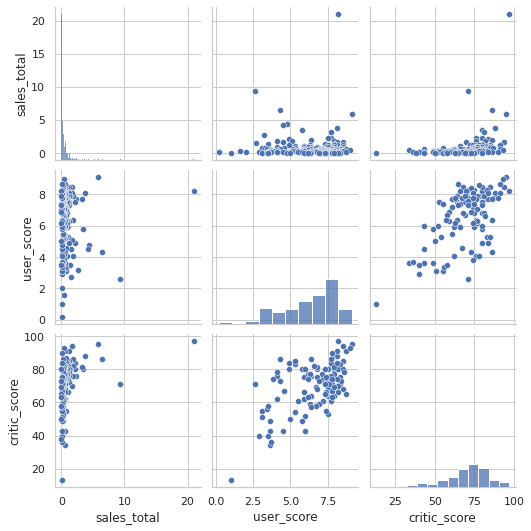


Для платформы X360:

,sales_total,user_score,critic_score
sales_total,1.000000,-0.011742,0.350345
user_score,-0.011742,1.000000,0.520946
critic_score,0.350345,0.520946,1.000000


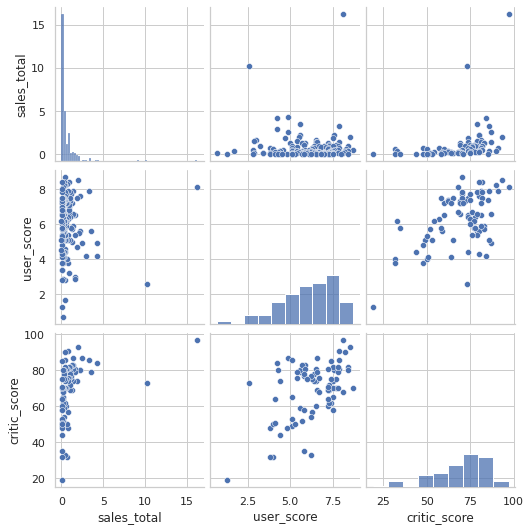


Для платформы WiiU:

,sales_total,user_score,critic_score
sales_total,1.000000,0.419330,0.376415
user_score,0.419330,1.000000,0.721313
critic_score,0.376415,0.721313,1.000000


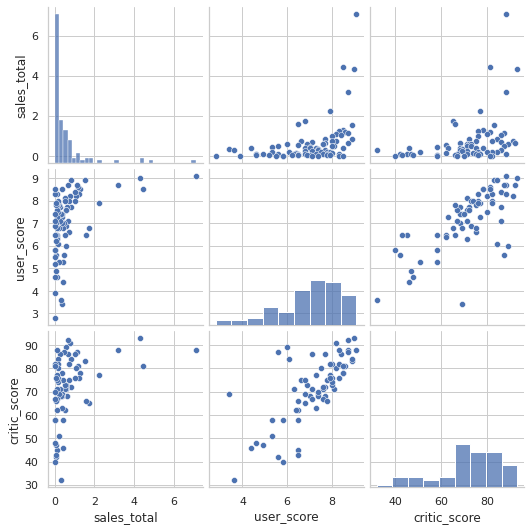

In [31]:
plats = ['PS4', 'PS3',  'X360', 'WiiU']

for plat in plats:
    print(f'Для платформы {plat}:', end = "")
    
    display(df.query('platform == @plat')[['sales_total', 
                                            'user_score', 
                                            'critic_score']].corr())
    
    sns.pairplot(df.query('platform == @plat')[['sales_total', 
                                            'user_score', 
                                            'critic_score']])
    plt.show()
    print('')
    

В целом, выводы по остальным плафтормам соответствуют выводам для XOne.

Посмотрим на общее распределение продаж игр в разбивке по жанрам

Text(0.5, 1.0, 'Распределение глобальных продаж игр с 2013г. в разбивке по жанрам')

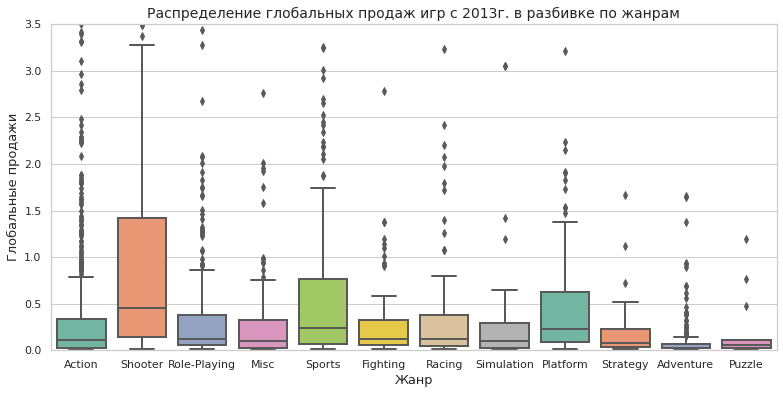

In [32]:
plt.rcParams['figure.figsize'] = [13, 6]

ax = sns.boxplot(x='genre', 
                 y='sales_total', 
                 linewidth=2,
                 palette='Set2',
                 data=df
                )
plt.ylim(0, 3.5)
plt.ylabel('Глобальные продажи', fontsize=13)
plt.xlabel('Жанр', fontsize=13)
plt.title('Распределение глобальных продаж игр с 2013г. в разбивке по жанрам', fontsize=14)

Выводы:
- Самые прибыльные жанры (с наибольшим уровнем распределений общих продаж, не учитывая выбросов): Shooter, Sports, Platform
- Наименее прибыльные жанры (с наименьшим уровнем распределений продаж): Puzzle, Adventure, Strategy

## Составление портрета пользователя каждого региона 

На данном шаге определим для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). 
- Самые популярные жанры (топ-5). 
- Выясним, влияет ли рейтинг ESRB на продажи в отдельном регионе.

#### Определим для пользователя каждого региона самые популярные платформы (топ-5)

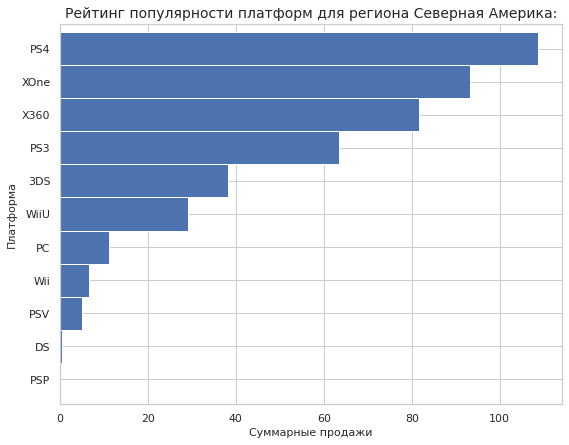

Топ-5 плаформ для региона Северная Америка:
1:PS4
2:XOne
3:X360
4:PS3
5:3DS




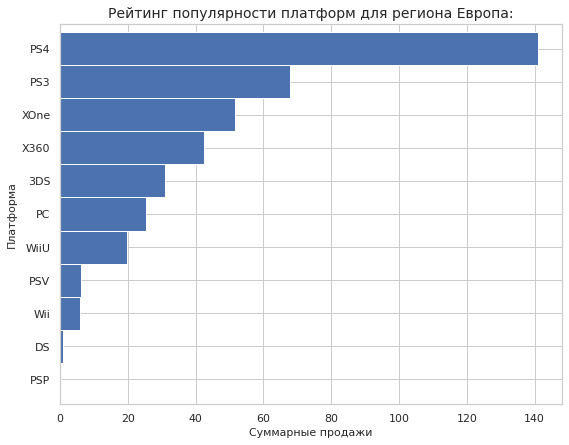

Топ-5 плаформ для региона Европа:
1:PS4
2:PS3
3:XOne
4:X360
5:3DS




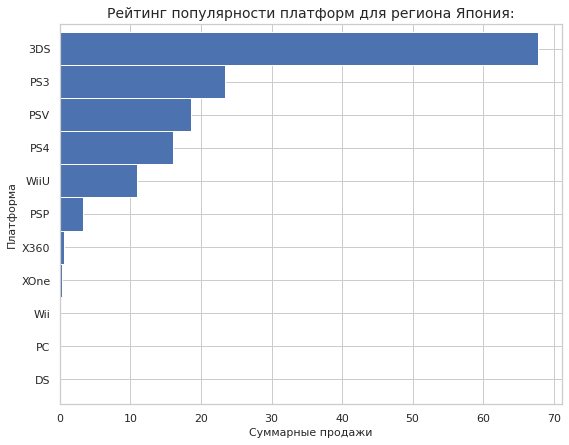

Топ-5 плаформ для региона Япония:
1:3DS
2:PS3
3:PSV
4:PS4
5:WiiU




In [33]:
#создадим словарь, связывающий названия столбцов с продажами и регионы, соответствующие им
regions = {'na_sales':'Северная Америка', 
           'eu_sales':'Европа', 
           'jp_sales':'Япония'}

for col, reg in regions.items():
    
    pivot = df.pivot_table(index = 'platform',
                     values = col,
                     aggfunc = 'sum').sort_values(by = col)
    
# построим барплот-рейтинг 
    pivot.plot(kind = 'barh',
                stacked = True,
                width=1,
                figsize = (9,7),
                legend = False
                )
    
    plt.ylabel('Платформа', fontsize=11)
    plt.xlabel('Суммарные продажи', fontsize=11)
    plt.title(f'Рейтинг популярности платформ для региона {reg}:', fontsize=14)
    plt.show()
    print(f'Топ-5 плаформ для региона {reg}:')
    
# топ-5 платформ    
    for i in range(5):
        print(f'{i+1}:{pivot.index[-1:-6:-1][i]}') 
    print('\n')    
    
   

#### Определим для пользователя каждого региона самые популярные жанры (топ-5)

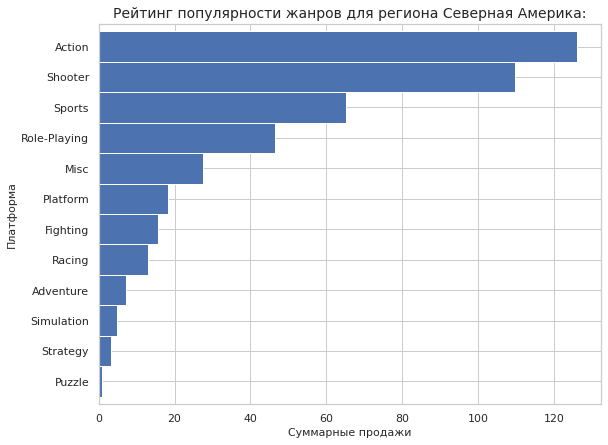

Топ-5 жанров для региона Северная Америка:
1:Action
2:Shooter
3:Sports
4:Role-Playing
5:Misc




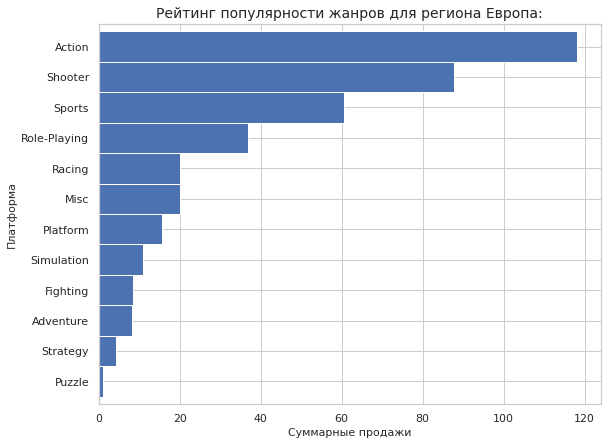

Топ-5 жанров для региона Европа:
1:Action
2:Shooter
3:Sports
4:Role-Playing
5:Racing




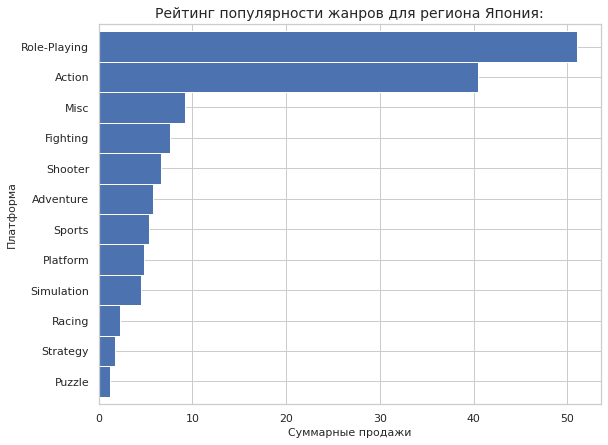

Топ-5 жанров для региона Япония:
1:Role-Playing
2:Action
3:Misc
4:Fighting
5:Shooter




In [34]:
for col, reg in regions.items():
    
    pivot = df.pivot_table(index = 'genre',
                            values = col,
                            aggfunc = 'sum'
                           ).sort_values(by = col)
# построим барплот-рейтинг    
    pivot.plot(kind = 'barh',
               stacked = True,
               width=1,
               figsize = (9,7),
               legend = False
                              )
    
    
    plt.ylabel('Платформа', fontsize=11)
    plt.xlabel('Суммарные продажи', fontsize=11)
    plt.title(f'Рейтинг популярности жанров для региона {reg}:', fontsize=14)
    plt.show()
    
    print(f'Топ-5 жанров для региона {reg}:')
    
#  топ-5 жанров   
    for i in range(5):
        print(f'{i+1}:{pivot.index[-1:-6:-1][i]}') 
        
    print('\n')  


#### Выясним, влияет ли рейтинг ESRB на продажи в отдельном регионе.

In [38]:
# для привличения к дальнейшему анализу заменим пропущенные значения в rating на Undefined
df.rating.fillna('Undefined', inplace = True)

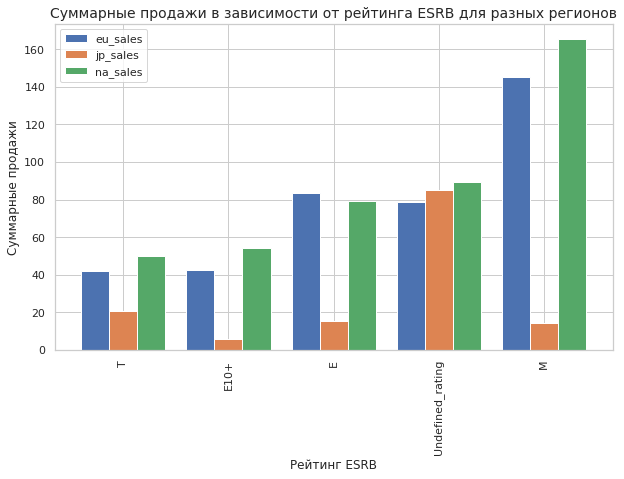

In [39]:
df.pivot_table(index='rating', 
               values = regions.keys(),
               aggfunc = 'sum'
              ).sort_values(by='na_sales').plot(kind = 'bar',   
                                                figsize = (10,6),
                                                width = 0.8,
                                                legend = True)
plt.xlabel('Рейтинг ESRB', fontsize=12)
plt.ylabel('Суммарные продажи', fontsize=12)
plt.title(f'Суммарные продажи в зависимости от рейтинга ESRB для разных регионов', fontsize=14)
plt.show()

Вывод: портреты пользователей из Северной Америки и Европы максимально похожи. У них полностью совпадают топ-5 по популярности платформ(PS4, XOne, X360, PS3, 3DS), а также зависимость продаж от рейтинга ESRB. Топ-5 жанров также почти не отличаются - для северной Америки это Action, Shooter, Sports, Role-Playing и Misc, для Европы: Action, Shooter, Sports, Role-Playing и Racing.


Портрет пользователя из Японии несколько отличается от портретов пользователей Северной Америки и Европы. Топ-5 плаформ для региона Япония: 3DS, PS3, PSV, PS4, WiiU. Топ-5 жанров: Role-Playing, Action, Misc, Fighting, Shooter. Зависимость продаж от рейтинга ESRB также отличается от таковой для пользователей из Европы и Америки.

In [36]:
# какие значния рейтинга ESRB имеются в актуальных данных с 2013 года
df.rating.unique()

array(['M', nan, 'E', 'T', 'E10+'], dtype=object)

In [37]:
# какие значния рейтинга ESRB имеются для всех данных 
df_init.rating.unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

## Проверка гипотез

На данном шаге проверим следющие статистические гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action и Sports разные.

Для проверки гипотез зададим пороговое значение уровня значимости   $\alpha$ = 0.05

In [38]:
alpha = 0.05

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

<AxesSubplot:xlabel='user_score', ylabel='Density'>

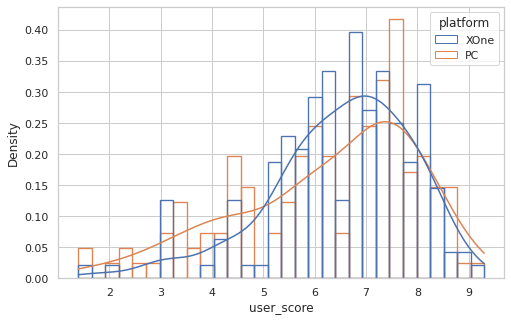

In [39]:
# Построим гистограммы для пользовательских рейтингов 
plt.figure(figsize=(8,5))

sns.histplot(data = df.query('platform == "PC" or platform == "XOne"'), 
                 x = 'user_score', 
                 hue = 'platform', 
                 kde = True,
                 bins = 30,
                 stat="density",
                 fill = False,
                 common_norm = False
               
                )


Видим, что распределения рейтингов для платформ Xone и PC визуально похожи, однако гистограмма для PC менее плотная

In [40]:
# Посчитаем статичстические параметры для пользовательских рейтингов 
cols = ['user_score']

print('PC:')

display(pd.DataFrame([df.query('platform == "PC"')[cols].mean(),
                      df.query('platform == "PC"')[cols].std(),
                      df.query('platform == "PC"')[cols].var(),
                      df.query('platform == "PC"')[cols].count()], index=['Mean', 'Std. dev', 'Variance', 'Count']))

print('XOne:')

display(pd.DataFrame([df.query('platform == "XOne"')[cols].mean(),
                      df.query('platform == "XOne"')[cols].std(),
                      df.query('platform == "XOne"')[cols].var(),
                      df.query('platform == "XOne"')[cols].count()], index=['Mean', 'Std. dev', 'Variance', 'Count']))

PC:


,user_score
Mean,6.269678
Std. dev,1.742381
Variance,3.035893
Count,155.000000


XOne:


,user_score
Mean,6.521429
Std. dev,1.380941
Variance,1.906997
Count,182.000000


Видим, что что на имеющейся выборке дисперсии рейтингов в зависимости от платформы отличаются (var=3 для PC против var=1.9 для Xone), поэтому при проверке гипотез стоит учитывать данный факт.

Сформулируем нулевую и альтернативную гипотезы:

- H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- H1: Средние пользовательские рейтинги платформы Xbox One и PC отличаются

In [41]:
sample_pc = df.query('platform == "PC"').user_score.dropna()
sample_xone = df.query('platform == "XOne"').user_score.dropna()

# Так как рейтинги пользователей для разных платформ не зависят друг от друга,
# будем сиспользовать t-test для сравнения средних значений двух независимых выборок

results = st.ttest_ind(sample_pc,
                       sample_xone,
                       equal_var = False) # дисперсии не считаем равными

print(f'p-значение: {results.pvalue}')

print('Не отвергаем нулевую гипотезу') if results.pvalue >= alpha else print('Отвергаем нулевую гипотезу')

p-значение: 0.14759702913383088
Не отвергаем нулевую гипотезу


#### Средние пользовательские рейтинги жанров Action и Sports разные

<AxesSubplot:xlabel='user_score', ylabel='Density'>

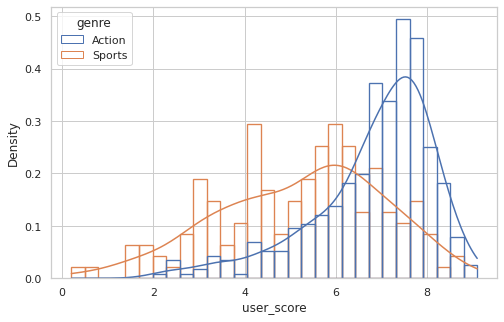

In [42]:
# Построим гистограммы для пользовательских рейтингов в зависимости от жанров 
plt.figure(figsize=(8,5))

sns.histplot(data = df.query('genre == "Action" or genre == "Sports"'), 
                 x = 'user_score', 
                 hue = 'genre', 
                 kde = True,
                 bins = 30,
                 stat="density",
                 fill = False,
                 common_norm = False
               
                )


Видим, что распределения рейтингов для жанров Action и Sports визуально существенно различаются. Гистрограмма для Action имеет вид скошенного нормального распределения, гистограмма для Sports меньше напоминает нормальное распределение и имеет больший разброс значений.  

In [43]:
# Посчитаем статичстические параметры для пользовательских рейтингов в зависимости от жанров 
cols = ['user_score']

print('Action:')

display(pd.DataFrame([df.query('genre == "Action"')[cols].mean(),
                      df.query('genre == "Action"')[cols].std(),
                      df.query('genre == "Action"')[cols].var(),
                      df.query('genre == "Action"')[cols].count()], index=['Mean', 'Std. dev', 'Variance', 'Count']))

print('Sports:')

display(pd.DataFrame([df.query('genre == "Sports"')[cols].mean(),
                      df.query('genre == "Sports"')[cols].std(),
                      df.query('genre == "Sports"')[cols].var(),
                      df.query('genre == "Sports"')[cols].count()], index=['Mean', 'Std. dev', 'Variance', 'Count']))

Action:


,user_score
Mean,6.837532
Std. dev,1.330173
Variance,1.769361
Count,389.000000


Sports:


,user_score
Mean,5.238125
Std. dev,1.783427
Variance,3.180613
Count,160.000000


Видим, что на имеющейся выборке дисперсии рейтингов в зависимости от платформы отличаются (var=3.2 для PC против var=1.8 для Xone), при проверке гипотез необходимо это учитывать.

Сформулируем нулевую и альтернативную гипотезы:

- H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые
- H1: Средние пользовательские рейтинги жанров Action и Sports отличаются

In [44]:
sample_action = df.query('genre == "Action"').user_score.dropna()
sample_sports = df.query('genre == "Sports"').user_score.dropna()

# Так как рейтинги пользователей для разных жанров не зависят друг от друга,
# будем использовать t-test для сравнения средних значений двух независимых выборок

results = st.ttest_ind(sample_action,
                       sample_sports,
                       equal_var = False) # дисперсии не считаем равными

print(f'p-значение: {results.pvalue}')

print('Не отвергаем нулевую гипотезу') if results.pvalue >= alpha else print('Отвергаем нулевую гипотезу')

p-значение: 1.445999656754529e-20
Отвергаем нулевую гипотезу


Вывод: 
- При проверке гипотезы о равенстве средних пользовательских рейтингов платформ Xbox One и PC, P-значение оказалось равным 0.14759702913383088, что выше заданного порогового значения $\alpha$. При таком высоком P-значении отвергнуть H0 не представляется возможным. Таким образом, средние пользовательские рейтинги платформ Xbox One и PC одинаковые

- При проверке гипотезы о равенстве средних пользовательских рейтингов жанров Action и Sports, P-значение оказалось равным 1.445999656754529e-20, что существенно меньше заданного порогового значения $\alpha$. При таком P-значении нулевая гипотеза H0 была отвергнута. Таким образом, средние пользовательские рейтинги жанров Action и Sports отличаются.

Видим, что в использование более строгого ограничения на параметр $\alpha$ (например, $\alpha$ = 0.01) не повлияло бы на полученные выводы.

## Общий вывод

В рамках проекта был проведен анализ данных по продажам видеоигр с 1980 по 2016 год. Были выявлены определяющие успешность игры закономерности.

Исходные данные были подготовлены и проверены на ошибки. По возможности в данных были заполнены пропуски (где это уместно). Дополнительно были расчитаны суммарные продажи во всех регионах.
В ходе исследовательского анализа данных было показано, что пиковые значения выпуска игр приходится на 2008-2009 годы. До 1994 года выпуск игр был минимальным, поэтому привлекать к дальнейшему анализу данные до 1994 года не имеет смысла. Было выявлено, что характерный срок, за который появляются новые и исчезают старые платформы: 3-4 года. Показано, что к 2015-2016г. из особо-продаваемых платформ наиболее популярной является PS4, выпуск игр на которой начался еще в 2013 году. Чтобы не учитывать при анализе устаревшие тренды, для последующего анализа 2013 год был принят за начало актуального периода. 

В ходе исследовательского анализа данных было выявлено:
- За весь период с 2013г. по 2016г. по суммарным продажам лидируют платформы PS4, PS3 и XOne
- Продажи игр на платформах PS4 и XOne к 2015-2016г. растут. У PS4 лучшие суммарные продажи в 2015 году. Продажи игр на всех других платформах стремительно падают
- PS4 и XOne можно выделить как потенциально прибыльные платформы
- Линейной зависимости между отзывами пользователей и общими продажами нет, коэффициент корреляции: -0.07. На диаграммах рассеивания также зависимости не прослеживается
- Между отзывами критиков и общимим продажами коэффициент корреляции 0.42, что говорит об отсутствии уверенной линейной взаимосвязи между признаками. Об этом говорит также график рассеяния - прослеживается некоторая завимость, которая лучше описывается нелинейной функцией, например, экспонентой.
- Самые прибыльные жанры (с наибольшим уровнем распределений общих продаж, не учитывая выбросов): Shooter, Sports, Platform
- Наименее прибыльные жанры (с наименьшим уровнем распределений продаж): Puzzle, Adventure, Strategy

В рамках проекта был составлен портрет пользователя для регионов NA, EU и JP. Портреты пользователей из Северной Америки и Европы максимально похожи. У них полностью совпадают топ-5 по популярности платформ (PS4, XOne, X360, PS3, 3DS), а также зависимость продаж от рейтинга ESRB. Топ-5 жанров также почти не отличаются - для северной Америки это Action, Shooter, Sports, Role-Playing и Misc, для Европы: Action, Shooter, Sports, Role-Playing и Racing. Больше всего у пользователей Северной Америки и Европы пользуются спросом игры категории M (игры для взрослых) , меньше всего - игры категории T (для подростков) по рейтингу ESRB.

Портрет пользователя из Японии несколько отличается от портретов пользователей Северной Америки и Европы. Топ-5 плаформ для региона Япония: 3DS, PS3, PSV, PS4, WiiU. Топ-5 жанров: Role-Playing, Action, Misc, Fighting, Shooter. Зависимость продаж от рейтинга ESRB также отличается от таковой для пользователей из Европы и Америки. У японцев больше всего пользуются спросом игры для подростков (T), меньше всего - игры для пользователей от 10 лет и старше (E10+).

В ходе статистического анализа были сформулированы нулевая и альтернативаня гипотезы о равенстве средних пользовательских рейтингов жанров Action и Sports:
- H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые

- H1: Средние пользовательские рейтинги жанров Action и Sports отличаются

Проверка гипотез выполнялась с помощью T-теста для сравнения средних значений двух независимых выборок. P-значение оказалось равным 1.446e-20, что существенно меньше заданного порогового значения  $\alpha$. Таким образом, H0 была отвергнута. Можем считать, что cредние пользовательские рейтинги жанров Action и Sports отличаются.

Для сравнения cредних пользовательских рейтингов платформ Xbox One и PC были сформулированы следующие нулевая и альтернативная гипотезы:
- H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- H1: Средние пользовательские рейтинги платформы Xbox One и PC отличаются

В данном случае также использовался T-тест для сравнения средних значений двух независимых выборок. P-значение оказалось равным 0.148, что существенно выше заданного порогового значения $\alpha$. При таком высоком P-значении отвергнуть H0 не представляется возможным. Таким образом, можем считать, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Резюмируя результаты проведенного анализа, можно заключить, что при планировании выпуска видеоигры на 2017 год, необходимо ограничить выбор платформы на PS4 и XOne - данные платформы выделяются как потенциально наиболее прибыльные к 2017 году. Среди жанров следует рассматривать Shooter, Sports и Platform. При планировании разных кампаний по выпуску игр для Японии и Северной Америки + Европы необходимо учитывать составленные портреты пользователей (в рамках исследования показано, что портрет игрока-японца отличается от авропейца и американца)